# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# set this so the graphs open internally
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv).

### Step 3. Assign it to a variable called chipo.

In [ ]:
chipo = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv', sep='\t')

### Step 4. See the first 10 entries

In [ ]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. Create a histogram of the top 5 items bought

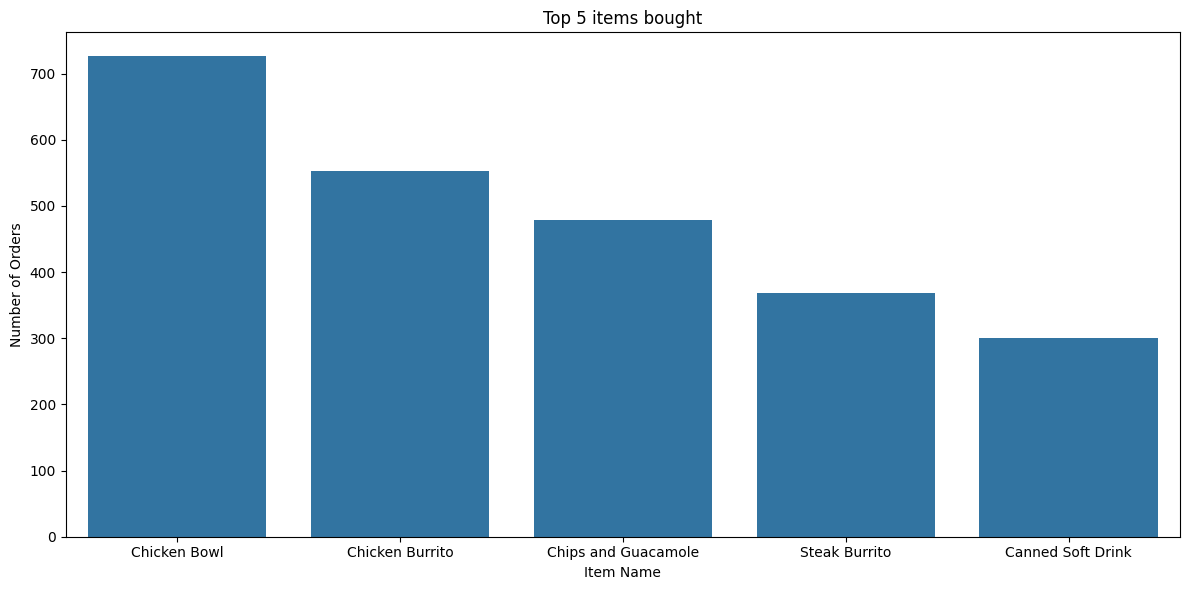

In [ ]:
# top 5 items
top5_item_df = chipo['item_name'].value_counts().head(5)

# 히스토그램 그리기
import seaborn as sns

plt.figure(figsize=(12,6))
sns.barplot(x=top5_item_df.index, y=top5_item_df.values)
plt.title('Top 5 items bought')
plt.xlabel('Item Name')
plt.ylabel('Number of Orders')
plt.tight_layout()

plt.show()

### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

In [ ]:
# create a list of prices
chipo.item_price = [float(value[1:-1]) for value in chipo.item_price] # strip the dollar sign and trailing space

# then groupby the orders and sum
orders = chipo.groupby('order_id').sum()

# creates the scatterplot
# plt.scatter(orders.quantity, orders.item_price, s = 50, c = 'green')
plt.scatter(x = orders.item_price, y = orders.quantity, s = 50, c = 'green')

# Set the title and labels
plt.xlabel('Order Price')
plt.ylabel('Items ordered')
plt.title('Number of items ordered per order price')
plt.ylim(0)

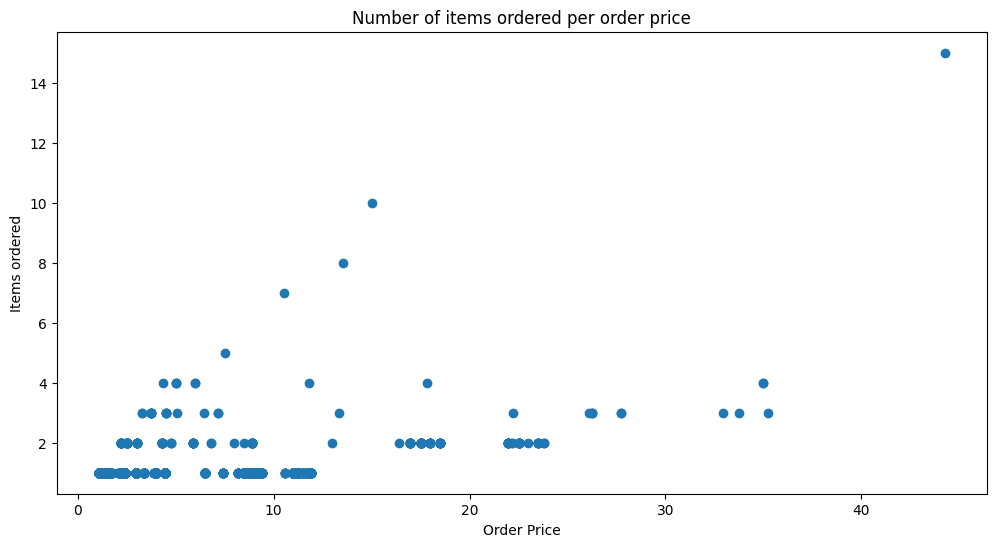

In [ ]:
## 시도1

# 가격을 실수형으로 바꿈

chipo['item_price'] = chipo['item_price'].str.replace('$', '').astype(float)

chipo.groupby('order_id')['item_price'].aggregate('sum')


# 한 사람이 주문 금액 당 구매한 물품의 개수
plt.figure(figsize=(12,6))
plt.scatter(x=chipo.item_price.values, y = chipo.quantity.values)
plt.xlabel('Order Price')
plt.ylabel('Items ordered')
plt.title('Number of items ordered per order price')
plt.show()


Text(0.5, 1.0, 'Number of items ordered per order price')

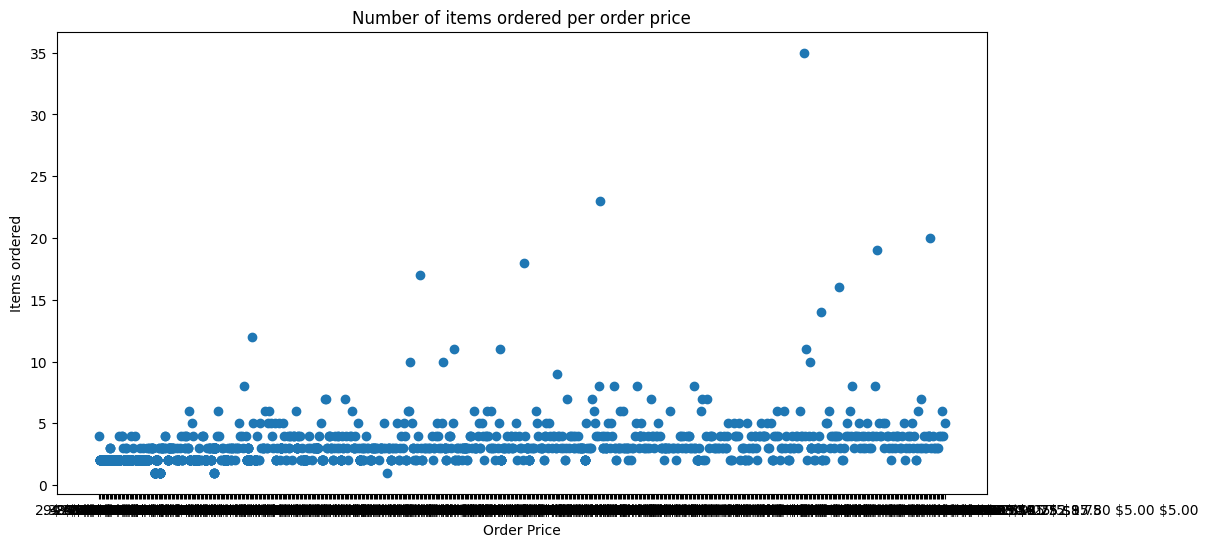

In [ ]:
## 시도2

# order_id 로 그룹화 : 한 사람이 구매한 물품의 개수
orders = chipo.groupby('order_id').sum()

# 한 사람이 주문 금액 당 구매한 물품의 개수
plt.figure(figsize=(12,6))
plt.scatter(x=orders.item_price, y = orders.quantity)
plt.xlabel('Order Price')
plt.ylabel('Items ordered')
plt.title('Number of items ordered per order price')
plt.show()

In [ ]:
orders.head(10)





,quantity,item_name,choice_description,item_price
order_id,,,,
1,4,Chips and Fresh Tomato SalsaIzzeNantucket Nect...,[Clementine][Apple],$2.39 $3.39 $3.39 $2.39
2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
3,2,Chicken BowlSide of Chips,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98 $1.69
4,2,Steak BurritoSteak Soft Tacos,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75 $9.25
5,2,Steak BurritoChips and Guacamole,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25 $4.45
6,2,Chicken Crispy TacosChicken Soft Tacos,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",$8.75 $8.75
7,2,Chicken BowlChips and Guacamole,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",$11.25 $4.45
8,2,Chips and Tomatillo-Green Chili SalsaChicken B...,"[Tomatillo-Green Chili Salsa (Medium), [Pinto ...",$2.39 $8.49
9,3,Chicken BurritoCanned Soda,"[Fresh Tomato Salsa (Mild), [Black Beans, Rice...",$8.49 $2.18


Text(0.5, 1.0, 'Number of items ordered per order price')

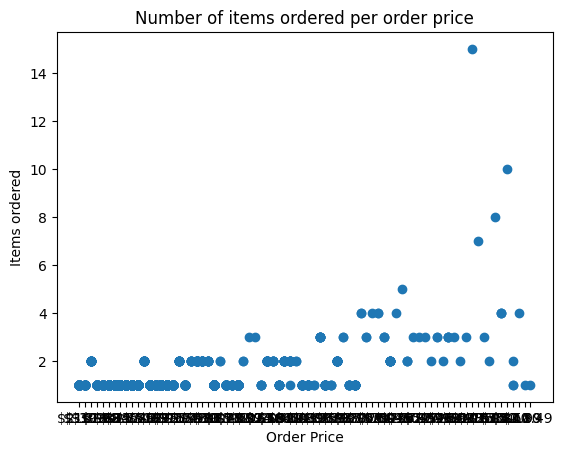

In [ ]:
## 시도3

plt.scatter(x=chipo.item_price, y = chipo.quantity)
plt.xlabel('Order Price')
plt.ylabel('Items ordered')
plt.title('Number of items ordered per order price')

### Step 7. BONUS: Create a question and a graph to answer your own question.